In [1]:
import csv
%pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt


## Open the Enrollment_age file in /Users/mariajosecota/Documents

file_path = '/Users/mariajosecota/Documents/Enrolment_2018_2019.csv' 

data = []
with open(file_path, 'r') as file:
    reader = csv.reader(file)
    headers = next(reader)  # Extract the first row as headers
    for row in reader:
        data.append(row)

# Assign the first column as variable names
variables = [row[0] for row in data]

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=headers)

# Display the DataFrame
# Convert relevant columns to integers
cols_to_convert = df.columns[6:]  # Assuming the first 6 columns are not to be converted
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df['reg_dst_code'] = df['Regcode'] + '_' + df['Dstcode']

print(df)

Note: you may need to restart the kernel to use updated packages.
    ﻿Census_Year Regcode   Region Dstcode             District   Status  \
0      2018-2019       1  ASHANTI      11         ADANSI NORTH  Private   
1      2018-2019       1  ASHANTI      11         ADANSI NORTH  Public    
2      2018-2019       1  ASHANTI      12         ADANSI SOUTH  Private   
3      2018-2019       1  ASHANTI      12         ADANSI SOUTH  Public    
4      2018-2019       1  ASHANTI      13        SEKYERE SOUTH  Private   
..           ...     ...      ...     ...                  ...      ...   
427    2018-2019      10  WESTERN     224               MPOHOR  Public    
428    2018-2019      10  WESTERN     225               SUAMAN  Private   
429    2018-2019      10  WESTERN     225               SUAMAN  Public    
430    2018-2019      10  WESTERN     226  WASA AMENFI CENTRAL  Private   
431    2018-2019      10  WESTERN     226  WASA AMENFI CENTRAL  Public    

     PreSch_Boys_Enr  PreSch_Girl

In [2]:


# Group By reg_dst_code and sum the values
df = df.groupby(['reg_dst_code', 'Region', 'District']).sum().reset_index()

# Select relevant columns
df_selected = df[['reg_dst_code', 'PreSch_Boys_Enr', 'PreSch_Girls_Enr', 'Kg1_Boys_Enr', 'Kg2_Girls_Enr', 
                  'P1_Boys_Enr', 'P1_Girls_Enr', 'P2_Boys_Enr', 'P2_Girls_Enr', 'P3_Boys_Enr', 'P3_Girls_Enr', 
                  'P4_Boys_Enr', 'P4_Girls_Enr', 'P5_Boys_Enr', 'P5_Girls_Enr', 'P6_Boys_Enr', 'P6_Girls_Enr', 
                  'J1_Boys_Enr', 'J1_Girls_Enr', 'J2_Boys_Enr', 'J2_Girls_Enr', 'J3_Boys_Enr', 'J3_Girls_Enr', 
                  'S1_Boys_Enr', 'S1_Girls_Enr', 'S2_Boys_Enr', 'S2_Girls_Enr', 'S3_Boys_Enr', 'S3_Girls_Enr', 
                  'GES_T1_Boys_Enr', 'GES_T1_Girls_Enr', 'GES_T2_Boys_Enr', 'GES_T2_Girls_Enr', 'GES_T3_Boys_Enr', 
                  'GES_T3_Girls_Enr', 'OTH_T1_Boys_Enr', 'OTH_T1_Girls_Enr', 'OTH_T2_Boys_Enr', 'OTH_T2_Girls_Enr', 
                  'OTH_T3_Boys_Enr', 'OTH_T3_Girls_Enr']]

df_melted = df_selected.melt(id_vars=['reg_dst_code'], value_vars=['PreSch_Boys_Enr', 'PreSch_Girls_Enr',
       'Kg1_Boys_Enr', 'Kg2_Girls_Enr', 'P1_Boys_Enr', 'P1_Girls_Enr',
       'P2_Boys_Enr', 'P2_Girls_Enr', 'P3_Boys_Enr', 'P3_Girls_Enr',
       'P4_Boys_Enr', 'P4_Girls_Enr', 'P5_Boys_Enr', 'P5_Girls_Enr',
       'P6_Boys_Enr', 'P6_Girls_Enr', 'J1_Boys_Enr', 'J1_Girls_Enr',
       'J2_Boys_Enr', 'J2_Girls_Enr', 'J3_Boys_Enr', 'J3_Girls_Enr',
       'S1_Boys_Enr', 'S1_Girls_Enr', 'S2_Boys_Enr', 'S2_Girls_Enr',
       'S3_Boys_Enr', 'S3_Girls_Enr', 'GES_T1_Boys_Enr', 'GES_T1_Girls_Enr',
       'GES_T2_Boys_Enr', 'GES_T2_Girls_Enr', 'GES_T3_Boys_Enr',
       'GES_T3_Girls_Enr', 'OTH_T1_Boys_Enr', 'OTH_T1_Girls_Enr',
       'OTH_T2_Boys_Enr', 'OTH_T2_Girls_Enr', 'OTH_T3_Boys_Enr',
       'OTH_T3_Girls_Enr'], var_name='Level', value_name='Value')

## Create a new variable called age where if the Level == PreSch_Boys_Enr or Level == PreSch_Girls_Enr, then age = 60
## if the Level == Kg1_Boys_Enr or Level == Kg2_Girls_Enr, then age = 50
## if the Level == P1_Boys_Enr or Level == P1_Girls_Enr, then age = 40

df_melted['age'] = df_melted['Level'].apply(lambda x: 3 if x in ['PreSch_Boys_Enr', 'PreSch_Girls_Enr'] 
                                            else (4 if x in ['Kg1_Boys_Enr', 'Kg1_Girls_Enr'] 
                                            else (5 if x in ['Kg2_Boys_Enr', 'Kg2_Girls_Enr'] 
                                            else (6 if x in ['P1_Boys_Enr', 'P1_Girls_Enr']
                                            else (7 if x in ['P2_Boys_Enr', 'P2_Girls_Enr']
                                            else (8 if x in ['P3_Boys_Enr', 'P3_Girls_Enr'] 
                                            else (9 if x in ['P4_Boys_Enr', 'P4_Girls_Enr'] 
                                            else (10 if x in ['P5_Boys_Enr', 'P5_Girls_Enr'] 
                                            else (11 if x in ['P6_Boys_Enr', 'P6_Girls_Enr'] 
                                            else (12 if x in ['J1_Boys_Enr', 'P6_Girls_Enr']
                                            else (13 if x in ['J2_Boys_Enr', 'P6_Girls_Enr']
                                            else (14 if x in ['J3_Boys_Enr', 'J3_Girls_Enr'] 
                                            else (15 if x in ['S1_Boys_Enr', 'S1_Girls_Enr'] 
                                            else (16 if x in ['S2_Boys_Enr', 'S2_Girls_Enr'] 
                                            else (17 if x in ['S3_Boys_Enr', 'S3_Girls_Enr'] 
                                            else (18 if x in ['GES_T1_Boys_Enr', 'GES_T1_Girls_Enr'] 
                                            else (19 if x in ['GES_T2_Boys_Enr', 'GES_T2_Girls_Enr'] 
                                            else (20 if x in ['GES_T3_Boys_Enr', 'GES_T3_Girls_Enr'] 
                                            else (21 if x in ['OTH_T1_Boys_Enr', 'OTH_T1_Girls_Enr'] 
                                            else (22 if x in ['OTH_T2_Boys_Enr', 'OTH_T2_Girls_Enr'] 
                                            else (23 if x in ['OTH_T3_Boys_Enr', 'OTH_T3_Girls_Enr']    
                                                        else None)))))))))))))))))))))



# Group by age and sum the values in Value
df_grouped_by_age = df_melted.groupby('age').sum().reset_index() 

# Now create a new column based on "Level" called "gender". If level contains "Boys", then assign "Male", If level contains "Girls", then assign "Female"
df_melted['gender'] = df_melted['Level'].apply(lambda x: 'Male' if 'Boys' in x else 'Female' if 'Girls' in x else None)
df_melted['Level'] = df_melted['Level'].str.replace('_Boys', '').str.replace('_Girls', '')

# Display the grouped DataFrame


df_melted = df_melted[df_melted['age'] <= 14]
df_melted = df_melted.drop(columns=['age'])

# Group by gender and reg_dst_code
df_grouped_by_gender = df_melted.groupby(['gender', 'reg_dst_code']).sum().reset_index()
df_grouped_by_gender = df_grouped_by_gender[['gender', 'reg_dst_code', 'Value']]


In [3]:
df_keys = df[['reg_dst_code', 'Region', 'District', 'Dstcode', 'Regcode']].drop_duplicates()
## now join df_grouped_by_gender with df_keys on reg_dst_code
df_merged = df_grouped_by_gender.merge(df_keys, on='reg_dst_code', how='left')

# Fill NaN values with a placeholder (e.g., 'Unknown') or drop rows with NaN values
df_merged.fillna('Unknown', inplace=True)  # or use df_merged.dropna(inplace=True)

# Lower case all column names
df_merged.columns = df_merged.columns.str.lower()

# Rename 'value' column to 'enroled'
df_merged.rename(columns={'value': 'enrolled'}, inplace=True)
df_merged['population'] = 1000
df_merged['rate'] = df_merged['enrolled'] / df_merged['population']

In [4]:
# Define the data
df_afrikids = {
    'district': [
        'SISSALA WEST', 'SISSALA EAST', 'BUILSA SOUTH', 'BUILSA NORTH', 'KASSENA-NANKANA WEST', 
        'KASSENA-NANKANA MUNICIPAL', 'BOLGATANGA MUNICIPAL', 'BONGO', 'NABDAM', 'TALENSI', 'BAWKU WEST', 
        'BINDURI', 'BAWKU MUNICIPAL', 'PUSIGA', 'GARU', 'BUNKRURUGU-NYAKPANDURI', 
        'MAMPRUGU-MOAGDRURI', 'KARAGA', 'KUMBUMGU', 'TOLON', 'SABOBA', 'KAPANDI', 'OTI', 
        'NKWNTA NORTH', 'NKWANTA SOUTH', 'KRACHI NCHUMURU', 'SAWKA TUNA KALBA', 'EAST GONJA', 
        'PRU WEST', 'PRU EAST', 'SENE WEST', 'SENE EAST'
    ],
    'region': [
        'UPPER WEST', 'UPPER WEST', 'UPPER EAST', 'UPPER EAST', 'UPPER EAST', 'UPPER EAST', 
        'UPPER EAST', 'UPPER EAST', 'UPPER EAST', 'UPPER EAST', 'UPPER EAST', 'UPPER EAST', 
        'UPPER EAST', 'UPPER EAST', 'UPPER EAST', 'NORTH EAST', 'NORTH EAST', 'NORTHERN', 
        'NORTHERN', 'NORTHERN', 'NORTHERN', 'NORTHERN', 'NORTHERN', 'NORTHERN', 'NORTHERN', 'NORTHERN', 'UPPER WEST', 
        'UPPER WEST', 'BRONG', 'BRONG', 'BRONG', 'BRONG'
    ]
}

# Convert df_afrikids to a DataFrame
df_afrikids = pd.DataFrame(df_afrikids)

In [7]:
# Perform a left join of df_merged with df_afrikids on the region and district columns

df_final = df_merged.merge(df_afrikids, on=['region', 'district'], how='left', indicator=True)

# Add a column called 'afrikids' that will take the value 1 if there is a perfect match
df_final['afrikids'] = df_final['_merge'].apply(lambda x: 1 if x == 'both' else 0) 

# Drop the '_merge' column as it is no longer needed
df_final.drop(columns=['_merge'], inplace=True)

# Group by district and region, then sum the values in enrolled
df_final_grouped = df_final.groupby(['district', 'region', 'afrikids']).sum().reset_index()
df_final_grouped = df_final_grouped[['district', 'region', 'enrolled', 'afrikids']]

# df_final_grouped ## ADDD POPULATION
# df_final = df_final_grouped['rate'] = df_merged['enrolled'] / df_merged['population']

,district,region,enrolled,afrikids
0,ABUAKWA SOUTH,EASTERN,37210.0,0
1,ABURA-ASEBU-KWAMANKESE,CENTRAL,31057.0,0
2,ACCRA METROPOLITAN,GREATER ACCRA,220140.0,0
3,ADA EAST,GREATER ACCRA,21048.0,0
4,ADA WEST,GREATER ACCRA,18266.0,0
...,...,...,...,...
211,WEST GONJA,NORTHERN,13890.0,0
212,WEST MAMPRUSI,NORTHERN,36850.0,0
213,YENDI MUNICIPAL,NORTHERN,42750.0,0
214,YILO KROBO,EASTERN,26047.0,0


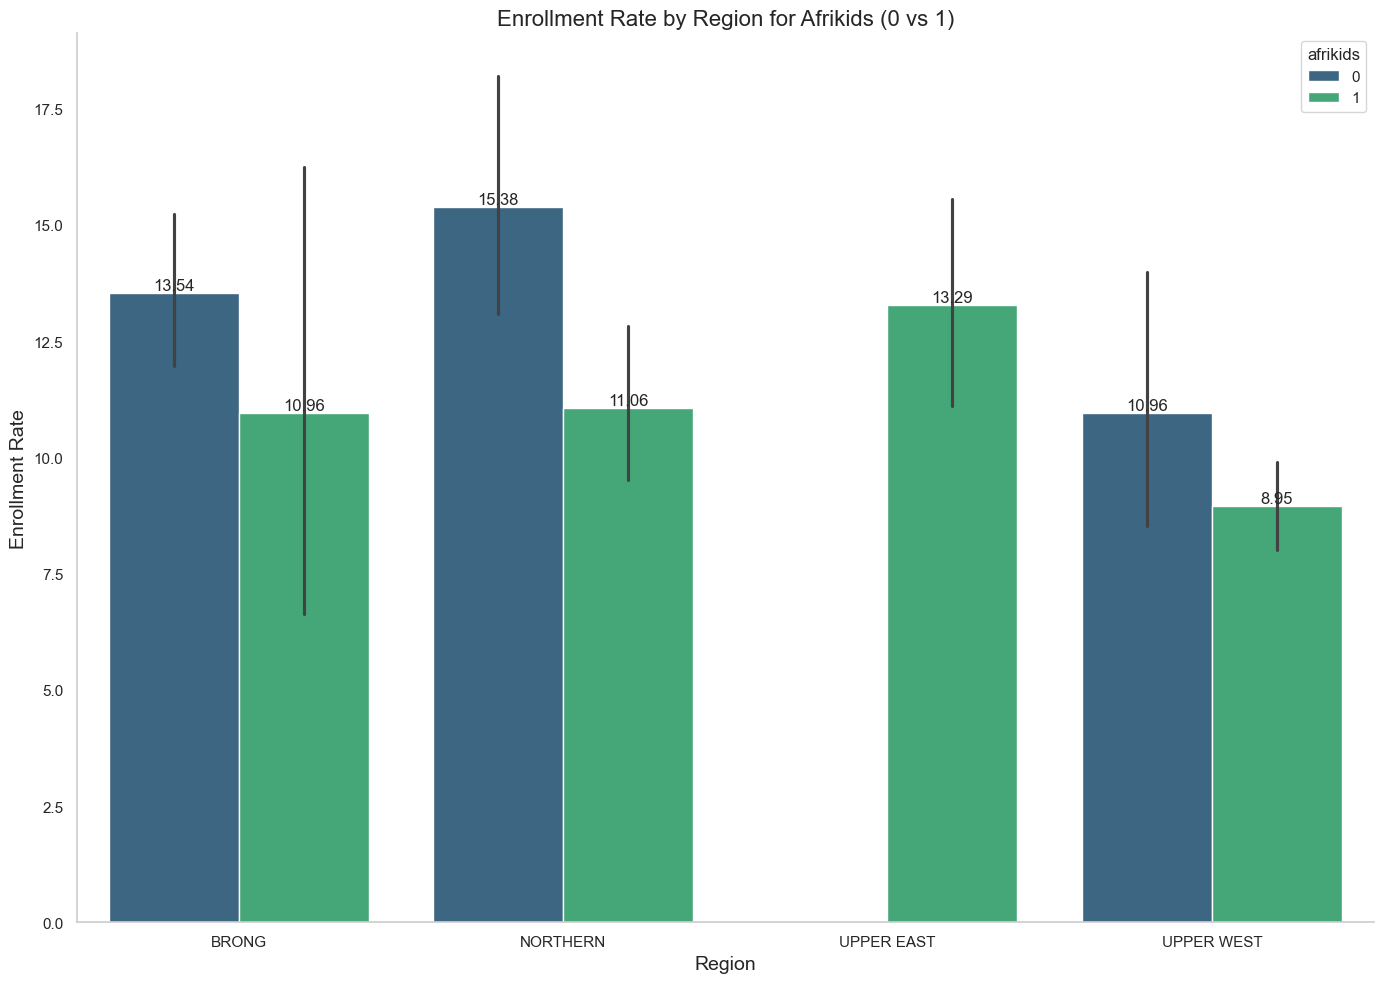

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Filter out rows where afrikids is 0 or 1
df_filtered = df_final[df_final['afrikids'].isin([0, 1])]

# Filter regions where there is at least one afrikids = 1
regions_with_afrikids = df_filtered[df_filtered['afrikids'] == 1]['region'].unique()
df_filtered = df_filtered[df_filtered['region'].isin(regions_with_afrikids)]

# Create a chart to compare rate within a region for afrikids = 0 and afrikids = 1
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create a bar plot
ax = sns.barplot(x='region', y='rate', hue='afrikids', data=df_filtered, palette="viridis")

# Add labels and title
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Enrollment Rate', fontsize=14)
ax.set_title('Enrollment Rate by Region for Afrikids (0 vs 1)', fontsize=16)

# Add value annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12)

# Customize the plot further
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.xaxis.set_tick_params(width=1.2)
ax.yaxis.set_tick_params(width=1.2)

# Remove the grid lines
ax.grid(False)

plt.tight_layout()
plt.show()
